In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 1000

# Generate random values for x
x = np.random.normal(0, 1, n)

# Generate y conditional on x
y = 2 * x + np.random.normal(0, 1, n)

# Generate z conditional on x
z = 3 * x + np.random.normal(0, 1, n)

# Create correlation matrix
corr_matrix = np.corrcoef(np.array([x, y, z]))

# Calculate precision matrix (inverse of the covariance matrix)
prec_matrix = np.linalg.inv(np.cov(np.array([x, y, z])))

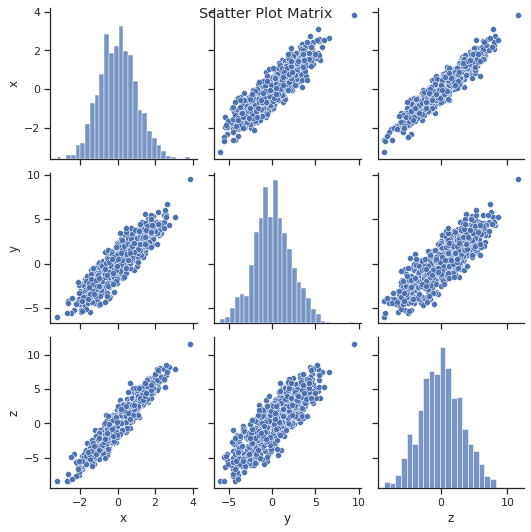

In [20]:
# Plot scatter plot matrix
sns.set(style="ticks")
sns.pairplot(pd.DataFrame({'x': x, 'y': y, 'z': z}))
plt.suptitle('Scatter Plot Matrix')
plt.show()

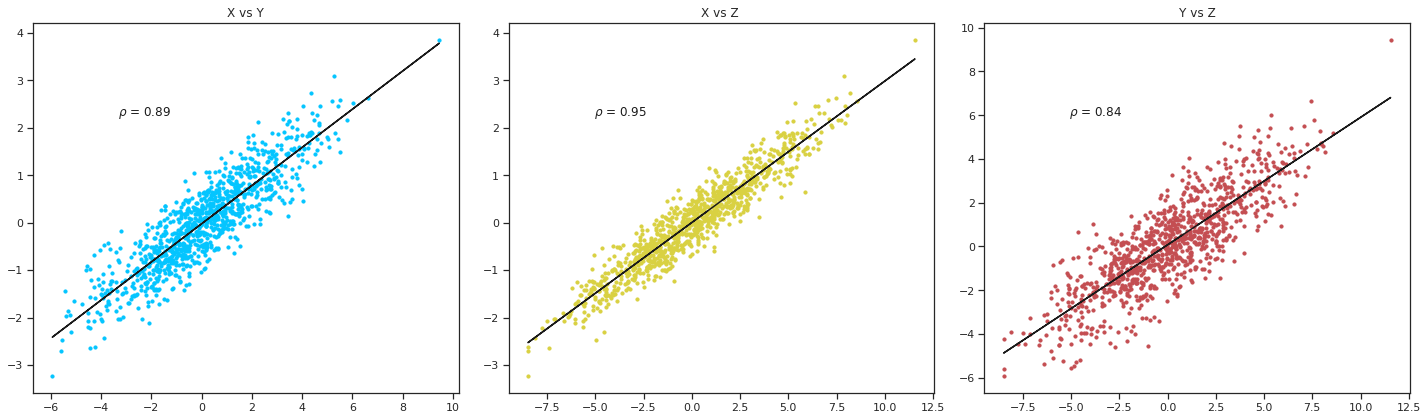

In [21]:
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
from numpy.polynomial import polynomial as poly


def plot_relationship(data, a, c, color, ax):
    """Plot a scatter plot with linear fit"""
    x, y = np.array(data[c]), np.array(data[a])
    # Linear fit (polynomial of degree 1)
    b, m = poly.polyfit(x, y, 1)
    # Plot scatterplot
    ax.scatter(data[c], data[a], c=color, marker='o', label=None, s=10)
    # Plot linear fit
    ax.plot(x, m * x + b, '-', color='k')
    if color == '#d9d142':
        ax.set_title(f'{a.capitalize()} vs {c.capitalize()} ')
    elif color == '#04c5ff':
        ax.set_title(f'{a.capitalize()} vs {c.capitalize()}')
    else:
        ax.set_title(f'{a.capitalize()} vs {c.capitalize()}')
    corr_coef = np.corrcoef(x, y)[0][1]
    ax.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize=12, color='k',
             transform=ax.transAxes)
    ax.set_ylabel('')
    
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

plot_relationship(df,'x', 'y', '#04c5ff', axs[0])
plot_relationship(df, 'x','z', '#d9d142', axs[1])
plot_relationship(df,'y' ,'z', 'r', axs[2])

plt.tight_layout()
plt.show()

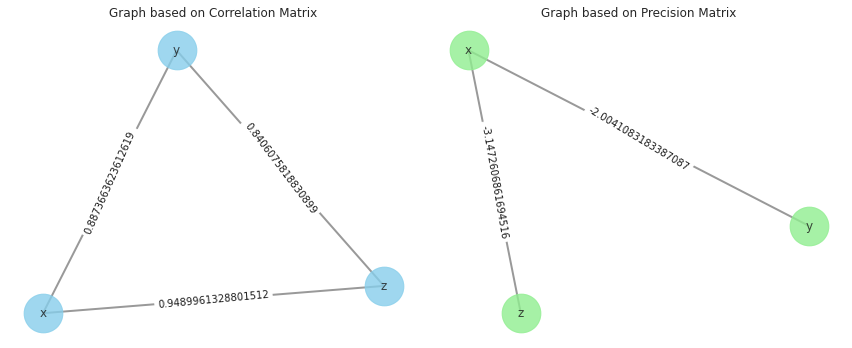

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Threshold for including edges in the graph
threshold = 0.05

# Create a graph based on the correlation matrix
G_corr = nx.Graph()
for i in range(len(corr_matrix)):
    for j in range(i + 1, len(corr_matrix)):
        if corr_matrix[i, j] > threshold:
            G_corr.add_edge(['x', 'y', 'z'][i], ['x', 'y', 'z'][j], weight=corr_matrix[i, j])

# Create a graph based on the precision matrix
G_prec = nx.Graph()
for i in range(len(prec_matrix)):
    for j in range(i + 1, len(prec_matrix)):
        if abs(prec_matrix[i, j]) > threshold:
            G_prec.add_edge(['x', 'y', 'z'][i], ['x', 'y', 'z'][j], weight=prec_matrix[i, j])

# Plot the graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Graph based on Correlation Matrix')
pos = nx.spring_layout(G_corr)
nx.draw(G_corr, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', width=2, alpha=0.8)
edge_labels = nx.get_edge_attributes(G_corr, 'weight')
nx.draw_networkx_edge_labels(G_corr, pos, edge_labels=edge_labels)

plt.subplot(1, 2, 2)
plt.title('Graph based on Precision Matrix')
pos = nx.spring_layout(G_prec)
nx.draw(G_prec, pos, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='gray', width=2, alpha=0.8)
edge_labels = nx.get_edge_attributes(G_prec, 'weight')
nx.draw_networkx_edge_labels(G_prec, pos, edge_labels=edge_labels)

plt.tight_layout()
plt.show()

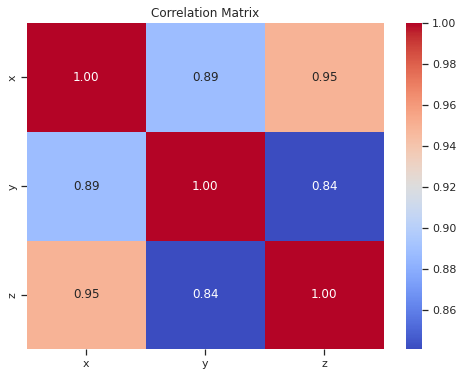

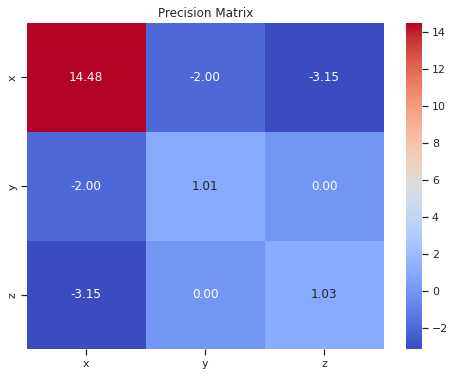

In [24]:
# Set values below 0.02 to 0
prec_matrix[abs(prec_matrix) < 0.02] = 0

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['x', 'y', 'z'], yticklabels=['x', 'y', 'z'])
plt.title('Correlation Matrix')
plt.show()

# Plot precision matrix
plt.figure(figsize=(8, 6))
sns.heatmap(prec_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['x', 'y', 'z'], yticklabels=['x', 'y', 'z'])
plt.title('Precision Matrix')
plt.show()